# Introduction

* **MDS-UPDRS** - Movement Disorder Society UPDRS revision.
    - Revised by removing all `yes` and `no` portions of the original questionaire.
    - Currently consists of `0-4` rating scale to maintain consistency.

**MDS-UPDRS consists of 4 parts:**

- Part I: Non-Motor Experiences of Daily Living
- Part II: motor Experiences of Daily Living
- Part III: Motor Examination
- Part IV: Motor Complications

**MDS-UPDRS staging scales:**
- Modified Hoehn and Yahr Staging
- Modeified Schwab and England Activities on Daily Living Scale

# Exploratory Data Analysis

EDA will cover the following data:

1. Clinical Data
2. Peptide Data
3. Protein Data

**Imports:**

In [1]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Read in DataFrames:**

In [2]:
df_train_clin = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
df_train_pept = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
df_train_prot = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

## Data Summary

### Clincal Data

In [3]:
df_train_clin.head(10)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
8,55_36,55,36,17.0,18.0,51.0,0.0,On
9,55_42,55,42,12.0,20.0,41.0,0.0,On


In [4]:
print(f'Unique Clinical Data patient #: {df_train_clin["patient_id"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Clinical Data:')
for col in df_train_clin.columns:
    print(f'Null values found in {col}: {df_train_clin[col].isna().sum()}')
print('')

Unique Clinical Data patient #: 248
----------------------------------------------------------
Null Values Found in Clinical Data:
Null values found in visit_id: 0
Null values found in patient_id: 0
Null values found in visit_month: 0
Null values found in updrs_1: 1
Null values found in updrs_2: 2
Null values found in updrs_3: 25
Null values found in updrs_4: 1038
Null values found in upd23b_clinical_state_on_medication: 1327



### Peptide Data

In [5]:
df_train_pept.head(10)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7
5,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.5
6,55_0,0,55,O00533,VIAVNEVGR,170878.0
7,55_0,0,55,O00533,VMTPAVYAPYDVK,148771.0
8,55_0,0,55,O00533,VNGSPVDNHPFAGDVVFPR,55202.1
9,55_0,0,55,O00584,ELDLNSVLLK,27229.3


In [6]:
print(f'Unique Peptide Data patient #: {df_train_pept["patient_id"].nunique()}')
print(f'Unique Peptides #: {df_train_pept["Peptide"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Peptide Data:')
for col in df_train_pept.columns:
    print(f'Null values found in {col}: {df_train_pept[col].isna().sum()}')
print('')

Unique Peptide Data patient #: 248
Unique Peptides #: 968
----------------------------------------------------------
Null Values Found in Peptide Data:
Null values found in visit_id: 0
Null values found in visit_month: 0
Null values found in patient_id: 0
Null values found in UniProt: 0
Null values found in Peptide: 0
Null values found in PeptideAbundance: 0



### Protein Data

In [7]:
df_train_prot.head(10)

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.30
1,55_0,0,55,O00533,732430.00
2,55_0,0,55,O00584,39585.80
3,55_0,0,55,O14498,41526.90
4,55_0,0,55,O14773,31238.00
5,55_0,0,55,O14791,4202.71
6,55_0,0,55,O15240,177775.00
7,55_0,0,55,O15394,62898.20
8,55_0,0,55,O43505,333376.00
9,55_0,0,55,O60888,166850.00


In [8]:
print(f'Unique Protein Data patient #: {df_train_prot["patient_id"].nunique()}')
print(f'Unique Proteins #: {df_train_prot["UniProt"].nunique()}')
print("----------------------------------------------------------")
print(f'Null Values Found in Protein Data:')
for col in df_train_prot.columns:
    print(f'Null values found in {col}: {df_train_prot[col].isna().sum()}')
print('')

Unique Protein Data patient #: 248
Unique Proteins #: 227
----------------------------------------------------------
Null Values Found in Protein Data:
Null values found in visit_id: 0
Null values found in visit_month: 0
Null values found in patient_id: 0
Null values found in UniProt: 0
Null values found in NPX: 0



## MDS-UPDRS SCORE ANALYSIS

### UPDRS_1 Score Analysis

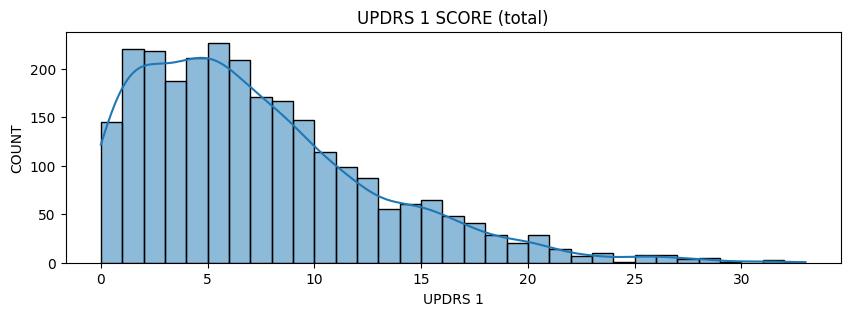

In [9]:
plt.figure(figsize = (10, 3))
sns.histplot(x=df_train_clin['updrs_1'], stat='count', kde = True)
plt.xlabel('UPDRS 1')
plt.ylabel('COUNT')
plt.title('UPDRS 1 SCORE (total)')
plt.show()

**Continuing EDA Soon**

## Target Preperation

In [10]:
targets = {}
for event in range(1, 5):
    for month in [0, 6, 12, 24]:
        df_train_clin[f'updrs_{event}_plus_{month}_months'] = 0

for p_id in df_train_clin.patient_id.unique():
    patient_data = df_train_clin[df_train_clin.patient_id == p_id]
    month_ranges = []
    month_intervals = [0, 6, 12, 24]
    for visit_month in patient_data.visit_month.values:
        month_ranges.append([visit_month, visit_month + 6, visit_month + 12, visit_month + 24])
    for idx, month_range in enumerate(month_ranges):
        for event in range(1, 5):
            updrs_values = patient_data[patient_data.visit_month.isin(month_range)][f'updrs_{event}'].fillna(0).to_list()
            if len(updrs_values) == 4:
                for e, value in enumerate(updrs_values):
                    m = month_range[0]
                    patient_data.loc[patient_data.visit_month == m, [f'updrs_{event}_plus_{month_intervals[e]}_months']] = value
            else:
                patient_data = patient_data[~patient_data.visit_month.isin(month_range)]
    targets[p_id] = patient_data


In [11]:
formatted_clin = pd.concat(targets.values(), ignore_index=True).set_index('visit_id').iloc[:, 7:]
formatted_clin.head()

,updrs_1_plus_0_months,updrs_1_plus_6_months,updrs_1_plus_12_months,updrs_1_plus_24_months,updrs_2_plus_0_months,updrs_2_plus_6_months,updrs_2_plus_12_months,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months
visit_id,,,,,,,,,,,,,,,,
55_0,10,8,10,16,6,10,10,9,15,34,41,49,0,0,0,0
55_6,8,10,7,14,10,10,13,13,34,41,38,49,0,0,0,0
55_12,10,7,16,17,10,13,9,18,41,38,49,51,0,0,0,0
55_18,7,16,14,12,13,9,13,20,38,49,49,41,0,0,0,0
55_24,16,14,17,17,9,13,18,16,49,49,51,52,0,0,0,0


## Feature Preperation

In [12]:
# Merging the proteins and peptides data
proteins_peptides = pd.merge(df_train_prot, df_train_pept, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])
merged_data = pd.merge(proteins_peptides, df_train_clin, on = ['visit_id', 'visit_month', 'patient_id'])


In [13]:
merged_data_pivotted = merged_data.pivot(index='visit_id', columns = ['Peptide'], values = 'PeptideAbundance')

In [14]:
merged_data_pivotted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [15]:
merged_data_pivotted.isnull().sum()

Peptide
AADDTWEPFASGK                                        43
AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K     64
AAFTEC(UniMod_4)C(UniMod_4)QAADK                      5
AANEVSSADVK                                         198
AATGEC(UniMod_4)TATVGKR                             192
                                                   ... 
YVNKEIQNAVNGVK                                        2
YWGVASFLQK                                           23
YYC(UniMod_4)FQGNQFLR                                 8
YYTYLIMNK                                            80
YYWGGQYTWDMAK                                       237
Length: 968, dtype: int64

In [16]:
nan_rows = merged_data_pivotted.loc[(merged_data_pivotted.isna()).all(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [AADDTWEPFASGK, AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K, AAFTEC(UniMod_4)C(UniMod_4)QAADK, AANEVSSADVK, AATGEC(UniMod_4)TATVGKR, AATVGSLAGQPLQER, AAVYHHFISDGVR, ADDKETC(UniMod_4)FAEEGK, ADDKETC(UniMod_4)FAEEGKK, ADDLGKGGNEESTKTGNAGSR, ADLSGITGAR, ADQVC(UniMod_4)INLR, ADRDQYELLC(UniMod_4)LDNTR, ADSGEGDFLAEGGGVR, AEAQEAEDQQAR, AEFAEVSK, AELQC(UniMod_4)PQPAA, AESPEVC(UniMod_4)FNEESPK, AFPALTSLDLSDNPGLGER, AGAAAGGPGVSGVC(UniMod_4)VC(UniMod_4)K, AGALNSNDAFVLK, AGC(UniMod_4)VAESTAVC(UniMod_4)R, AGDFLEANYMNLQR, AGKEPGLQIWR, AGLAASLAGPHSIVGR, AGLLRPDYALLGHR, AGLQVYNK, AIGAVPLIQGEYMIPC(UniMod_4)EK, AIGYLNTGYQR, AIPVTQYLK, AIQLTYNPDESSKPNMIDAATLK, AKAYLEEEC(UniMod_4)PATLRK, AKLEEQAQQIR, AKPALEDLR, AKWEMPFDPQDTHQSR, ALANSLAC(UniMod_4)QGK, ALDFAVGEYNK, ALEQDLPVNIK, ALEYIENLR, ALFLETEQLK, ALGISPFHEHAEVVFTANDSGPR, ALGISPFHEHAEVVFTANDSGPRR, ALMSPAGMLR, ALPGTPVASSQPR, ALQDQLVLVAAK, ALSIGFETC(UniMod_4)R, ALSSEWKPEIR, ALTDMPQMR, ALVQQMEQLR, ALYLQYTDETFR, ANAGKPKDPTFIPAP

In [17]:
df = merged_data_pivotted.merge(formatted_clin, left_index=True,right_index=True,how='right')
print(f'\nNA values: {df[merged_data_pivotted.columns].isna().sum().sum()/(len(df)*len(merged_data_pivotted.columns)):.2%}')
df['visit_month'] = df.reset_index().visit_id.str.split('_').apply(lambda x: int(x[1])).values
df.head()


NA values: 54.03%


,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,8984260.0,53855.6,8579740.0,NaN,19735.4,114400.0,46371.1,70412.0,7404060.0,39389.3,...,9,15,34,41,49,0,0,0,0,0
55_6,8279770.0,45251.9,8655890.0,49927.5,23820.4,90539.4,38652.4,63052.4,7344740.0,40871.1,...,13,34,41,38,49,0,0,0,0,6
55_12,8382390.0,53000.9,8995640.0,45519.2,17813.5,147312.0,45840.9,72325.0,6635000.0,35002.7,...,18,41,38,49,51,0,0,0,0,12
55_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,38,49,49,41,0,0,0,0,18
55_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16,49,49,51,52,0,0,0,0,24


In [18]:
df

,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,8984260.0,53855.6,8579740.0,NaN,19735.4,114400.0,46371.1,70412.0,7404060.0,39389.3,...,9,15,34,41,49,0,0,0,0,0
55_6,8279770.0,45251.9,8655890.0,49927.5,23820.4,90539.4,38652.4,63052.4,7344740.0,40871.1,...,13,34,41,38,49,0,0,0,0,6
55_12,8382390.0,53000.9,8995640.0,45519.2,17813.5,147312.0,45840.9,72325.0,6635000.0,35002.7,...,18,41,38,49,51,0,0,0,0,12
55_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,38,49,49,41,0,0,0,0,18
55_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16,49,49,51,52,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65043_12,8070390.0,76532.7,8233520.0,54260.6,11631.9,230169.0,42255.5,441297.0,4386040.0,43775.4,...,7,14,13,0,5,0,0,0,0,12
65043_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,13,0,4,15,0,0,0,0,18
65043_24,7608150.0,75401.6,9168030.0,NaN,13313.9,220202.0,46914.1,529563.0,5542360.0,30188.3,...,6,0,4,5,13,0,0,0,0,24


In [19]:
df.isnull().sum()

AADDTWEPFASGK                                       490
AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K    503
AAFTEC(UniMod_4)C(UniMod_4)QAADK                    477
AANEVSSADVK                                         570
AATGEC(UniMod_4)TATVGKR                             562
                                                   ... 
updrs_4_plus_0_months                                 0
updrs_4_plus_6_months                                 0
updrs_4_plus_12_months                                0
updrs_4_plus_24_months                                0
visit_month                                           0
Length: 985, dtype: int64

In [20]:
def extract_month(visit_id):
    split_visit_id = visit_id.split('_')
    return int(split_visit_id[1])

unique_visit_months = df.reset_index().visit_id.apply(extract_month).unique().tolist()
protein_list = merged_data_pivotted.columns.tolist()


In [21]:
X = df[merged_data_pivotted.columns.to_list() + ["visit_month"]]
y = df[formatted_clin.columns]
print('\nX and y shapes:')
X.shape, y.shape


X and y shapes:


((954, 969), (954, 16))

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

X.loc[:, 'visit_month'] = X['visit_month'].astype(float)
y = y.astype(float)

# Define a ColumnTransformer to scale and impute numerical features
preprocessor = make_column_transformer(
    (make_pipeline(KNNImputer(), StandardScaler()), 
     make_column_selector(dtype_include='number'))
)

# Apply the preprocessor to X to obtain the transformed data
X_transformed = preprocessor.fit_transform(X)


/tmp/ipykernel_23/3756483888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'visit_month'] = X['visit_month'].astype(float)
/tmp/ipykernel_23/3756483888.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'visit_month'] = X['visit_month'].astype(float)


# sMAPE Function

In [23]:
import tensorflow.keras.backend as K

def smape_loss_plus_one(y_true, y_pred):
    epsilon = 0.1
    numer = K.abs(y_pred + 1 - y_true - 1)
    denom = K.maximum(K.abs(y_true) + K.abs(y_pred) + 2*epsilon, 1.5 + 2*epsilon)
    smape_plus_one = numer / (denom/2)
    smape_plus_one = tf.where(tf.math.is_nan(smape_plus_one), tf.zeros_like(smape_plus_one), smape_plus_one)
    return smape_plus_one

def calculate_smape_plus_one(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numer = np.round(np.abs(y_pred + 1 - y_true - 1), 0)
    denom = np.round(np.abs(y_true) + np.abs(y_pred) + 2, 0)
    smape_plus_one = 1/len(y_true) * np.sum(np.nan_to_num(numer / (denom/2))) * 100
    return smape_plus_one


# TensorFlow Model

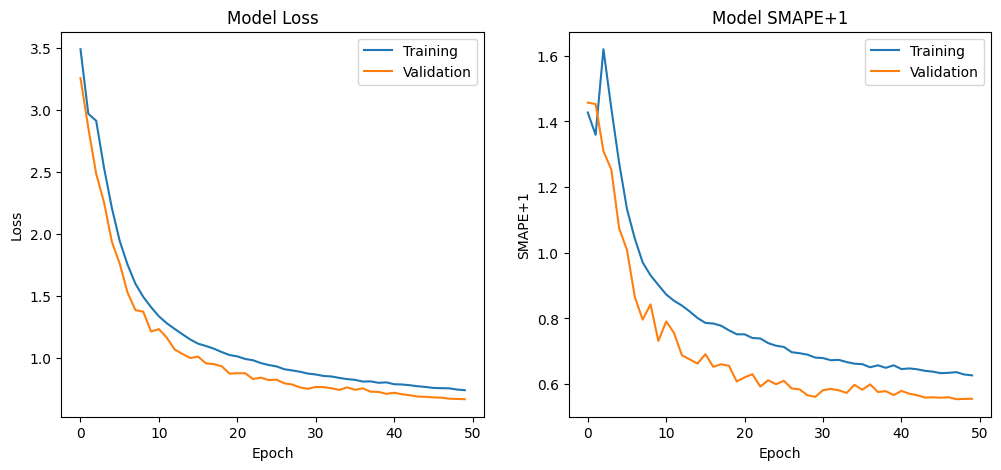

Final training loss: 0.7381107807159424
Final validation loss: 0.6653352379798889


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

"""model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], 1), activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.15))
model.add(Dense(y.shape[1], activation='linear'))

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])

# Reshape input data to be suitable for LSTM layers
X_transformed = X_transformed.reshape(X_transformed.shape[0], X_transformed.shape[1], 1)

history = model.fit(X_transformed, y, epochs=500, batch_size=64, validation_split=.2, verbose=False)"""

import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

model = Sequential()
model.add(GRU(128, input_shape=(X.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.15))
model.add(GRU(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
model.add(Dropout(0.15))
model.add(GRU(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.15))
model.add(Dense(y.shape[1], activation='linear'))

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])

# Reshape input data to be suitable for GRU layers
X_transformed = X_transformed.reshape(X_transformed.shape[0], X_transformed.shape[1], 1)

history = model.fit(X_transformed, y, epochs=50, batch_size=64, validation_split=.2, verbose=False)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(['Training', 'Validation'])

# Plot training and validation SMAPE+1
axs[1].plot(history.history['smape_loss_plus_one'])
axs[1].plot(history.history['val_smape_loss_plus_one'])
axs[1].set_title('Model SMAPE+1')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('SMAPE+1')
axs[1].legend(['Training', 'Validation'])

plt.show()

# Print the final training and validation loss
print('Final training loss:', history.history['loss'][-1])
print('Final validation loss:', history.history['val_loss'][-1])



import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], 1), activation='relu', return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.15))
model.add(Dense(y.shape[1], activation='linear'))

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])

# Reshape input data to be suitable for LSTM layers
X_transformed = X_transformed.reshape(X_transformed.shape[0], X_transformed.shape[1], 1)

history = model.fit(X_transformed, y, epochs=500, batch_size=64, validation_split=.2, verbose=False)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(['Training', 'Validation'])

# Plot training and validation SMAPE+1
axs[1].plot(history.history['smape_loss_plus_one'])
axs[1].plot(history.history['val_smape_loss_plus_one'])
axs[1].set_title('Model SMAPE+1')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('SMAPE+1')
axs[1].legend(['Training', 'Validation'])

plt.show()

# Print the final training and validation loss
print('Final training loss:', history.history['loss'][-1])
print('Final validation loss:', history.history['val_loss'][-1])



import tensorflow.keras.backend as K

def smape_loss_plus_one(y_true, y_pred):
    epsilon = 0.1
    numer = K.abs(y_pred + 1 - y_true - 1)
    denom = K.maximum(K.abs(y_true) + K.abs(y_pred) + 2*epsilon, 1.5 + 2*epsilon)
    smape_plus_one = numer / (denom/2)
    smape_plus_one = tf.where(tf.math.is_nan(smape_plus_one), tf.zeros_like(smape_plus_one), smape_plus_one)
    return smape_plus_one

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])
history = model.fit(
    X_transformed,
    y,
    epochs=500,
    batch_size=32,
    verbose=False,
    validation_split=.2
)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(['Training', 'Validation'])

# Plot training and validation SMAPE+1
axs[1].plot(history.history['smape_loss_plus_one'])
axs[1].plot(history.history['val_smape_loss_plus_one'])
axs[1].set_title('Model SMAPE+1')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('SMAPE+1')
axs[1].legend(['Training', 'Validation'])

plt.show()


history = model.fit(
    X_transformed,
    y,
    epochs = 800,
    verbose = False,
    validation_split = .2
)
pd.DataFrame(history.history).plot()

# Submission Preperation

In [25]:
test_proteins = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv') 
test_peptides = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv') 
sample_submission = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv')
clinical = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv')

In [26]:
def prepare_features(clinical, proteins):
    """Format features"""
    X_submission = proteins.pivot(index='visit_id',columns='UniProt', values='NPX')
    
    
    missing_visits = np.setdiff1d(np.array(clinical.visit_id.unique()), np.array(X_submission.index)).tolist()
    missing_proteins = np.setdiff1d(np.array(protein_list), np.array(X_submission.columns)).tolist()
    for mv in missing_visits:
        X_submission.loc[mv] = np.NaN
    
    for mp in missing_proteins:
        X_submission.loc[:,mp] = np.NaN
        
    X_submission = X_submission[protein_list]    
    X_submission['visit_month'] = X_submission.reset_index().visit_id.str.split("_").apply(lambda x: int(x[1])).values    
    X_submission.visit_month = X_submission.visit_month.astype('float')
    
    return X_submission
def get_predictions(features, model):
    """Make predictions from prepared features"""
    X_submission_trans = preprocessor.transform(features)
    # Predict and format ratings
    pred_submission = np.around(np.abs(model.predict(X_submission_trans)),0)
    pred_submission = pd.DataFrame(pred_submission, index= features.index, columns = y.columns)
    
    return pred_submission
def format_predictions(predictions, sample_submission):
    """Format predictions for submission"""
    pred_submission = pd.DataFrame(predictions.stack())

    # Map predictions to sample_submission
    pred_submission.index = pred_submission.index.map('_'.join)
    pred_submission.columns = ['rating']
    sample_submission.rating = sample_submission.prediction_id.map(pred_submission.rating)
    
    return sample_submission.fillna(0)

In [27]:
# Prepare test features
test_features = prepare_features(clinical, test_proteins)

# Make predictions for test features
test_predictions = get_predictions(test_features, model)

# Format predictions for submission
test_submission = format_predictions(test_predictions, sample_submission)

# Print the first few rows of the submission
print(test_submission.head())



/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

1/1 [==============================] - 1s 872ms/step
                   prediction_id  rating  group_key
0   3342_0_updrs_1_plus_0_months     7.0          0
1   3342_0_updrs_1_plus_6_months     7.0          0
2  3342_0_updrs_1_plus_12_months     7.0          0
3  3342_0_updrs_1_plus_24_months     8.0          0
4   3342_0_updrs_2_plus_0_months     7.0          0


In [28]:
test_features = prepare_features(clinical, test_proteins)
test_predictions = get_predictions(test_features,model)
test_submission = format_predictions(test_predictions, sample_submission)
test_submission

/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

1/1 [==============================] - 0s 486ms/step


,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,7.0,0
1,3342_0_updrs_1_plus_6_months,7.0,0
2,3342_0_updrs_1_plus_12_months,7.0,0
3,3342_0_updrs_1_plus_24_months,8.0,0
4,3342_0_updrs_2_plus_0_months,7.0,0
...,...,...,...
59,50423_6_updrs_3_plus_24_months,25.0,6
60,50423_6_updrs_4_plus_0_months,0.0,6
61,50423_6_updrs_4_plus_6_months,0.0,6
62,50423_6_updrs_4_plus_12_months,0.0,6


# Submission

In [29]:
import sys
sys.path.append('/kaggle/input/amp-parkinsons-disease-progression-prediction')

import amp_pd_peptide_310
env = amp_pd_peptide_310.make_env()   # environment provided by competition
iter_test = env.iter_test()

In [30]:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    sub_features = prepare_features(test, test_proteins)
    sub_predictions = get_predictions(sub_features,model)
    submission = format_predictions(sub_predictions, sample_submission)

    env.predict(submission)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

1/1 [==============================] - 0s 483ms/step


/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_submission.loc[:,mp] = np.NaN
/tmp/ipykernel_23/1028954736.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

1/1 [==============================] - 0s 465ms/step


In [31]:
pd.read_csv('/kaggle/working/submission.csv')

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,7.0
1,3342_0_updrs_1_plus_6_months,7.0
2,3342_0_updrs_1_plus_12_months,7.0
3,3342_0_updrs_1_plus_24_months,8.0
4,3342_0_updrs_2_plus_0_months,7.0
...,...,...
59,50423_6_updrs_3_plus_24_months,25.0
60,50423_6_updrs_4_plus_0_months,0.0
61,50423_6_updrs_4_plus_6_months,0.0
62,50423_6_updrs_4_plus_12_months,0.0


https://www.kaggle.com/code/umbertofasci/amp-pdpp-eda-tf-model/notebook#sMAPE-Function